# Tarea semana 4

Este jupyter está basado en el proyecto del siguiente link: https://github.com/1adrianb/face-alignment, donde se ve que aplican todo lo que es la parte de la alinación 2D y 3D.

Este primer codigo importa un algoritmo que permite encontrar los puntos faciales basicos, ubicados en la boca, los ojos, etc. de un rostro encontrado en la imagen que ingresemos, para luego aplicar el SVR el cual es un regresor lineal que permite aproximar la posición de otros 67 puntos faciales para tener una mejor representación del rostro al momento de aplicar el modelo 3D. Luego importa skimage que es una libreria utíl para el manejo de imagenes de las cuales queramos aplicar el algoritmo.


In [3]:
import face_alignment #Algoritmo que encuentra los distintos puntos faciales.
from skimage import io #manejo de imagenes jpg.

#Esta primera función importa de face_alignment la función que permite detectar los diferentes puntos faciales
#La cual mapea en matrices de 3x3 la imagen y extrae la información de la imagen para detectar los puntos faciales
#Inicialmente identifica puntos 6 puntos faciales, pero con estos realiza una estimación para encontrar los otros 67 puntos.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False) 

#En esta parte se define la dirección en la cual se encuentra la imagen en el computador para poder manejarla con skimage.
input = io.imread('C:/Users/Javier Valladares/Desktop/archivos semestre 2019/Modelacion/3D alignment/face-alignment-master/face-alignment-master/test/assets/Fiesta.jpg')

#Finalmente se obtienen los puntos faciales de la imagen.
preds = fa.get_landmarks(input)

Este segundo codigo es similar al primero, pero en vez de aplicar el algoritmo que busca los puntos faciales a una imagen, este codigo permite hacerlo para una carpeta de imagenes.

In [4]:
import face_alignment #Algoritmo que encuentra los distintos puntos faciales.
from skimage import io #manejo de imagenes jpg.

#Esta primera función importa de face_alignment la función que permite detectar los diferentes puntos faciales
#La cual mapea en matrices de 3x3 la imagen y extrae la información de la imagen para detectar los puntos faciales
#Inicialmente identifica puntos 6 puntos faciales, pero con estos realiza una estimación para encontrar los otros 67 puntos.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)


#Esta parte define la dirección de un directorio, lo que permite procesar una carpeta de imagenes entera.
preds = fa.get_landmarks_from_directory('C:/Users/Javier Valladares/Desktop/archivos semestre 2019/Modelacion/3D alignment/face-alignment-master/face-alignment-master/test/assets/')

100%|██████████| 8/8 [00:20<00:00,  2.58s/it]


Este ultimo codigo recopila toda la información obtenida para una imagen y utilizando librerías para graficar en 2D y 3D, grafica los puntos obtenidos, tanto los 6 puntos principale que se obtienen en primera instancia como los otros 67 obtenidos por el SVR.

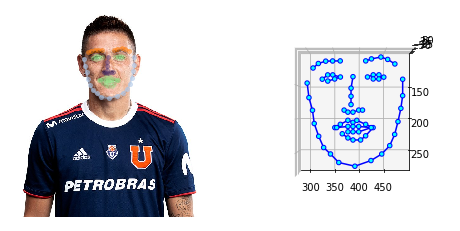

In [5]:
import face_alignment #Algoritmo que encuentra los distintos puntos faciales.
import matplotlib.pyplot as plt #Librería para graficar datos.
from mpl_toolkits.mplot3d import Axes3D #Librería que permite hacer gráficos 3D.
from skimage import io #manejo de imagenes jpg.
import collections #librería para el manejo de tuplas.


# Esta función obtiene un modelo 3D y un promedio de la posición de los puntos faciales que encontramos previamente.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True)

name = 'matigol' #Nombre de la iamgen a estudiar

try:
    input_img = io.imread('C:/Users/Javier Valladares/Desktop/archivos semestre 2019/Modelacion/3D alignment/face-alignment-master/face-alignment-master/test/assets/'+name+'.jpg')
except FileNotFoundError:
    input_img = io.imread('test/assets/'+name+'.jpg')

preds = fa.get_landmarks(input_img)[-1]

#Define un estilo para el gráfico 2D.
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

#Define colores para distintos puntos en el rostro.
pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

#En esta parte del codigo se muestra la imagen con los puntos faciales en el rostro por pantalla.
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

#Este for se encarga de graficar los distintos puntos que se encontraron en el rostro
for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color, **plot_style)

ax.axis('off')

#Esta primera función genera gráficos en 3D.
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:, 0] * 1.2,
                  preds[:, 1],
                  preds[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

#Este for se encarga de graficar los puntos encontrados con el promedio obtenido del modelo 3D genérico.
for pred_type in pred_types.values():
    ax.plot3D(preds[pred_type.slice, 0] * 1.2,
              preds[pred_type.slice, 1],
              preds[pred_type.slice, 2], color='blue')

#En esta parte del codigo de muestra por pantalla el gráfico 3D
ax.view_init(elev=90., azim=90.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()